In [57]:
import pandas as pd
import numpy as np
import os

# Cargar los datos
data = pd.read_csv('bbdd/redcard_data.csv')
data.head

data['age'] = 2013 - pd.to_datetime(data['birthday']).dt.year

/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_7538/2996599315.py:9: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['age'] = 2013 - pd.to_datetime(data['birthday']).dt.year


In [58]:
data['elite'] = np.where(data['club'].isin([
    'FC Barcelona', 'Real Madrid','Atlético Madrid',
    'Borussia Dortmund', 'Bayern München','Bayer Leverkusen',
    'Olympique Lyon','Paris Saint Germain','Olympique Marseille',
    'Chelsea FC', 'Manchester City','Manchester United'
]), 1, 0)
data['elite'] = data['elite'].map({1: 'Elite', 0: 'No-Elite'})
data['elite'] = data['elite'].astype(str)

data


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,age,elite
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,30,No-Elite
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,31,No-Elite
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,21,No-Elite
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,20,No-Elite
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,22,No-Elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146023,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,33,No-Elite
146024,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,25,No-Elite
146025,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,22,Elite
146026,yassine-el-ghanassi,Yassine El Ghanassi,West Bromwich Albion,England,12.07.1990,173.0,NaN,Left Winger,1,0,...,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,23,No-Elite


In [59]:
data['rater_mean'] = data.apply(
    lambda row: row['rater2'] * 2 if pd.isna(row['rater1']) else 
                (row['rater1'] * 2 if pd.isna(row['rater2']) else 
                 (row['rater1'] + row['rater2']) / 2), 
    axis=1
)
# Eliminar filas con cualquier valor NaN
data = data.dropna()
# Mostrar las primeras filas de 'rater_mean' y 'elite'
print(data[['rater_mean', 'elite']].head(2))




   rater_mean     elite
0       0.375  No-Elite
1       0.750  No-Elite


## Hacer histograma 


In [60]:
import pandas as pd
stats_by_elite = data.groupby('elite').agg(
    age_mean=('age', 'mean'),
    rater_mean_mean=('rater_mean', 'mean')
).reset_index()

# Mostrar los resultados
print(stats_by_elite)

      elite   age_mean  rater_mean_mean
0     Elite  27.494500         0.276224
1  No-Elite  28.376855         0.282722


In [61]:
import pandas as pd
stats_by_position = data.groupby('position').agg(
    age_mean=('age', 'mean'),
    rater_mean_mean=('rater_mean', 'mean')
).reset_index()

# Mostrar los resultados
print(stats_by_position)

                position   age_mean  rater_mean_mean
0   Attacking Midfielder  27.196430         0.204611
1            Center Back  28.829425         0.263680
2         Center Forward  27.930987         0.352239
3      Center Midfielder  27.357158         0.205252
4   Defensive Midfielder  28.033798         0.318046
5             Goalkeeper  29.988095         0.178606
6          Left Fullback  28.049577         0.293978
7        Left Midfielder  27.975677         0.278471
8            Left Winger  27.787016         0.350684
9         Right Fullback  28.487634         0.298603
10      Right Midfielder  26.885720         0.228154
11          Right Winger  27.530167         0.416748


In [63]:
# Mapear los valores de la columna 'elite' a números
data['elite'] = data['elite'].map({'No-Elite': 0, 'Elite': 1})

# Verificar los cambios
print(data['elite'].unique())


[0 1]


/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_7538/4292044660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['elite'] = data['elite'].map({'No-Elite': 0, 'Elite': 1})


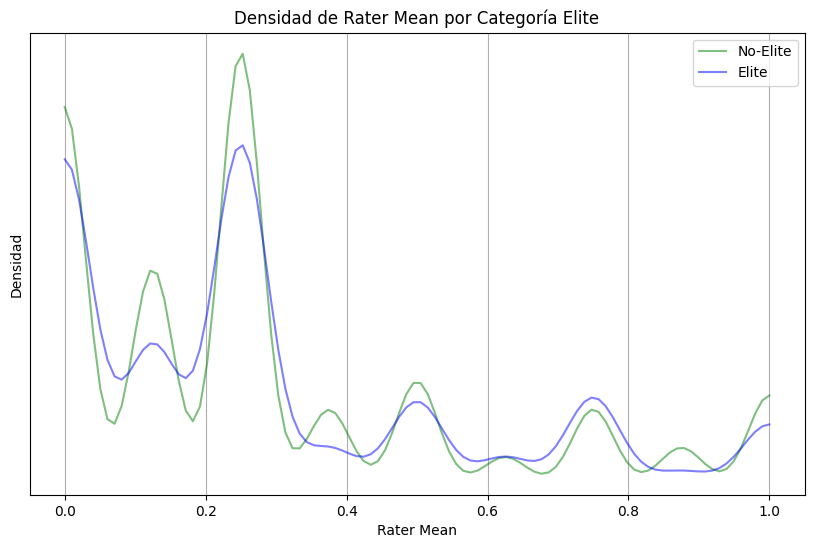

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Suponiendo que tienes un dataframe llamado 'data' con las columnas 'elite' y 'rater_mean'

plt.figure(figsize=(10, 6))

# Calcular la densidad para No Elite
rater_mean_no_elite = data[data['elite'] == 0]['rater_mean']
density_no_elite = gaussian_kde(rater_mean_no_elite)
x_vals_no_elite = np.linspace(min(rater_mean_no_elite), max(rater_mean_no_elite), 100)
plt.plot(x_vals_no_elite, density_no_elite(x_vals_no_elite), color="green", alpha=0.5, label='No-Elite')

# Calcular la densidad para Elite
rater_mean_elite = data[data['elite'] == 1]['rater_mean']
density_elite = gaussian_kde(rater_mean_elite)
x_vals_elite = np.linspace(min(rater_mean_elite), max(rater_mean_elite), 100)
plt.plot(x_vals_elite, density_elite(x_vals_elite), color="blue", alpha=0.5, label='Elite')

# Personalizar el gráfico
plt.title('Densidad de Rater Mean por Categoría Elite')
plt.xlabel('Rater Mean')
plt.ylabel('Densidad')
# Ocultar los números del eje Y
plt.yticks([])
plt.legend()
plt.grid(True)

# Guardar el gráfico con fondo blanco
plt.savefig('images/grafico1.png')

# Mostrar el gráfico
plt.show()


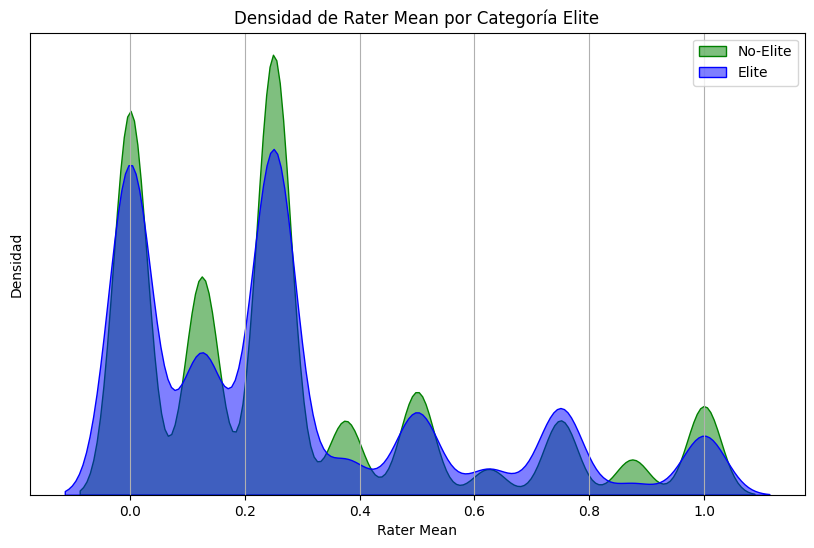

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un dataframe llamado 'data' con las columnas 'elite' y 'rater_mean'

plt.figure(figsize=(10, 6))

# Crear el gráfico de densidad para No Elite 
sns.kdeplot(data=data[data['elite'] == 0], x='rater_mean', fill=True, color="green", alpha=0.5, label='No-Elite', common_norm=True)

# Crear el gráfico de densidad para Elite
sns.kdeplot(data=data[data['elite'] == 1], x='rater_mean', fill=True, color="blue", alpha=0.5, label='Elite', common_norm=True)

# Personalizar el gráfico
plt.title('Densidad de Rater Mean por Categoría Elite')
plt.xlabel('Rater Mean')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)

# Ocultar los números del eje Y
plt.yticks([])



# Guardar el gráfico con fondo blanco
plt.savefig('images/grafico2.png')

# Mostrar el gráfico
plt.show()
